# Quantum Statistical Potential

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/QSP/input_files/QSP_cgs.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/QSP/QSP_Tutorial.ipynb).

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess

# Create the file path to the YAML input file
input_file_name = os.path.join('input_files',  'ei_therm.yaml')








     _______.     ___      .______       __  ___      ___           _______.
    /       |    /   \     |   _  \     |  |/  /     /   \         /       |
   |   (----`   /  ^  \    |  |_)  |    |  '  /     /  ^  \       |   (----`
    \   \      /  /_\  \   |      /     |    <     /  /_\  \       \   \    
.----)   |    /  _____  \  |  |\  \----.|  .  \   /  _____  \  .----)   |   
|_______/    /__/     \__\ | _| `._____||__|\__\ /__/     \__\ |_______/    
                                                                            


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Preprocessing                                  
********************************************************************************

Job ID: qsp_cgs
Job directory: SarkasSimulations/qsp_cgs
PreProcessing directory: 
SarkasSimulations/qsp_cgs/PreProcessing

Equil

PP acceleration timer:   0%|          | 0/11 [00:00<?, ?it/s]

Time of PP acceleration calculation averaged over 10 steps:
0 min 0 sec 100 msec 364 usec 720 nsec 



PM acceleration timer:   0%|          | 0/11 [00:00<?, ?it/s]

Time of PM acceleration calculation averaged over 10 steps:
0 min 0 sec 38 msec 246 usec 579 nsec 



  0%|          | 0/11 [00:00<?, ?it/s]

Time of a single Equilibration step averaged over 10 steps:
0 min 0 sec 144 msec 592 usec 390 nsec 



  0%|          | 0/11 [00:00<?, ?it/s]

Time of a single Production step averaged over 10 steps:
0 min 0 sec 148 msec 464 usec 144 nsec 



----------------------- Total Estimated Times ------------------------ 


Equilibration Time: 4 hrs 0 min 59 sec

Production Time: 0 hrs 0 min 29 sec

Total Run Time: 4 hrs 1 min 28 sec


========================= Filesize Estimates =========================

Equilibration:
	H5MD filesize: 1 GB 542 MB 566 KB 868 bytes

Production:
	H5MD filesize: 0 GB 31 MB 548 KB 100 bytes

Total minimum required space: 1 GB 574 MB 90 KB 968 bytes


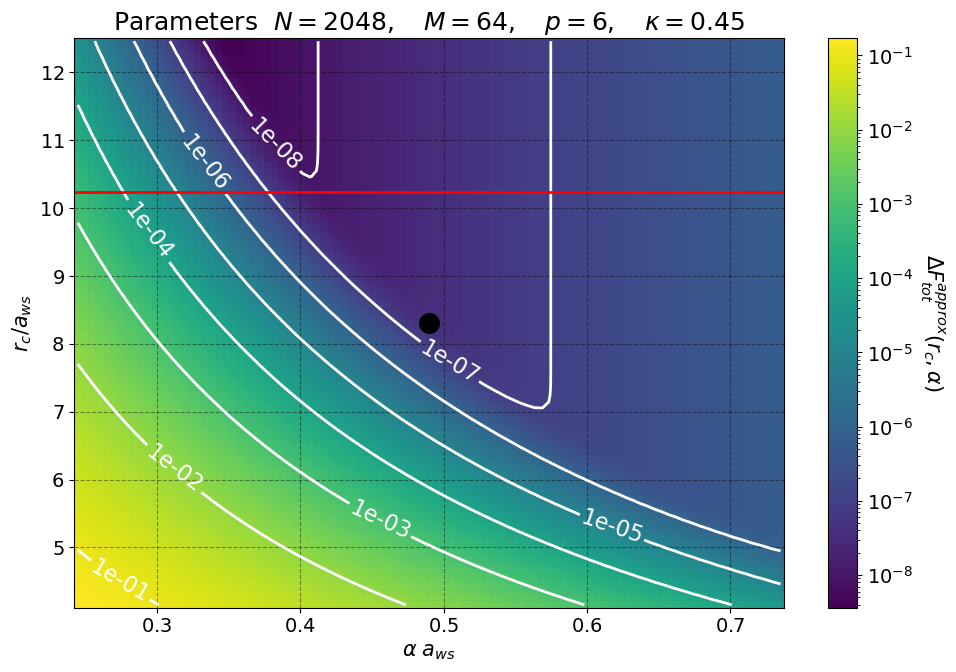

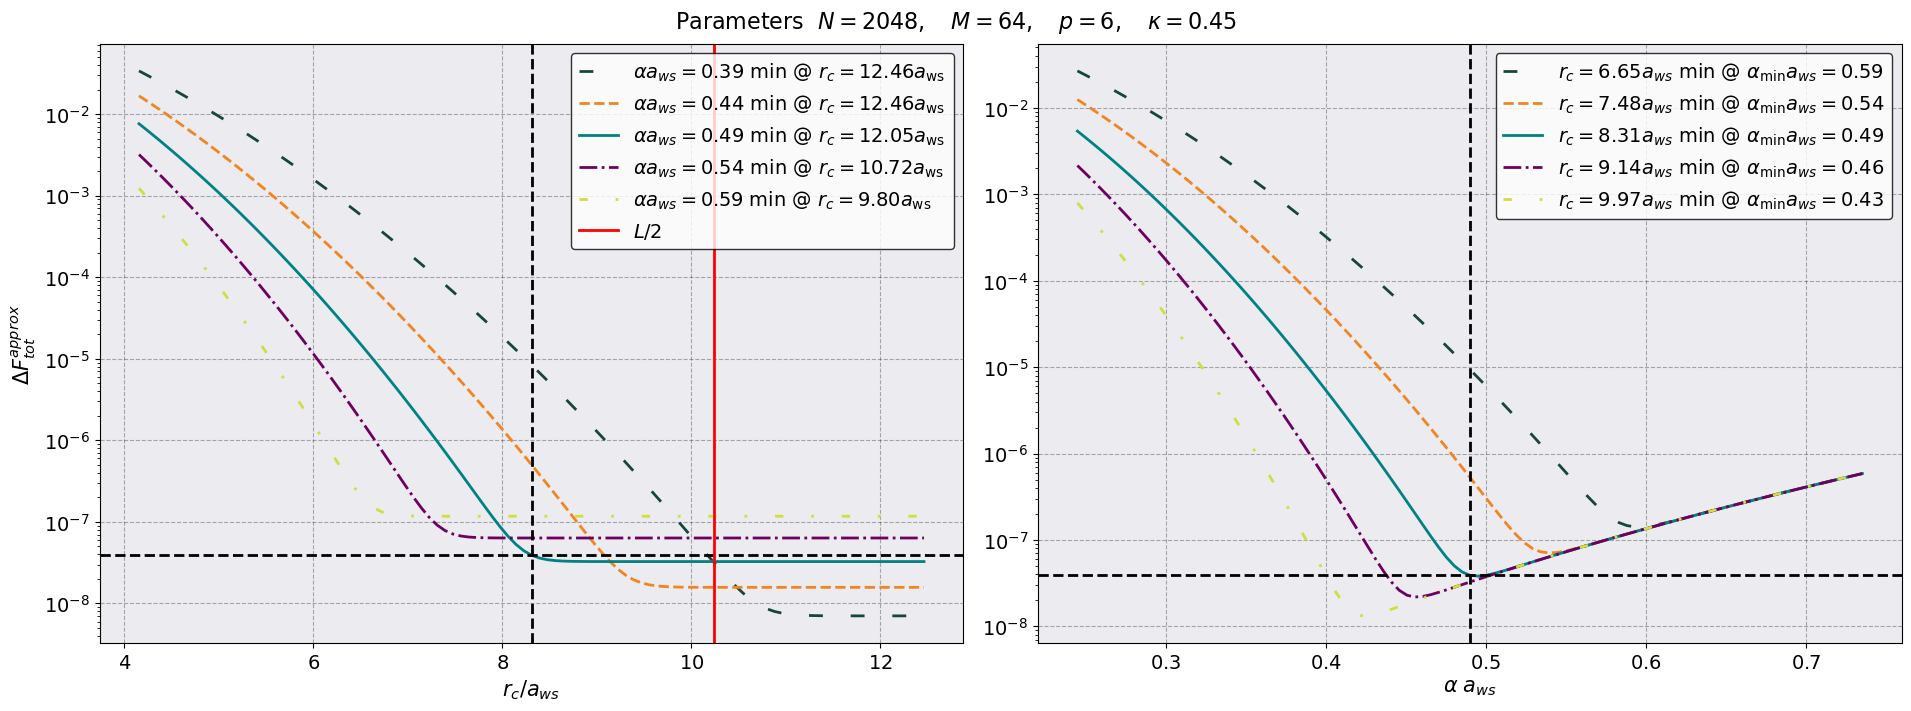

In [13]:
pre = PreProcess(input_file_name)
pre.setup(read_yaml=True)
pre.run(loops = 10, timing = True, pppm_estimate=True)

In [11]:
f"alpha = {0.49 / pre.parameters.a_ws:.6e}"

'alpha = 4.619223e+06'

In [ ]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()

In [2]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/qsp_cgs/PostProcessing/Thermodynamics/Equilibration/Thermodynamics_qsp_cgs.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 10001
Total time per block: T = 7.0209e-15 [s] ~ 80 plasma periods
Time interval: dt = 7.0208e-19 [s] ~ 8.0e-03 plasma period

Data file not found! 
 SarkasSimulations/qsp_cgs/PostProcessing/Thermodynamics/Equilibration/Thermodynamics_qsp_cgs_raw.h5


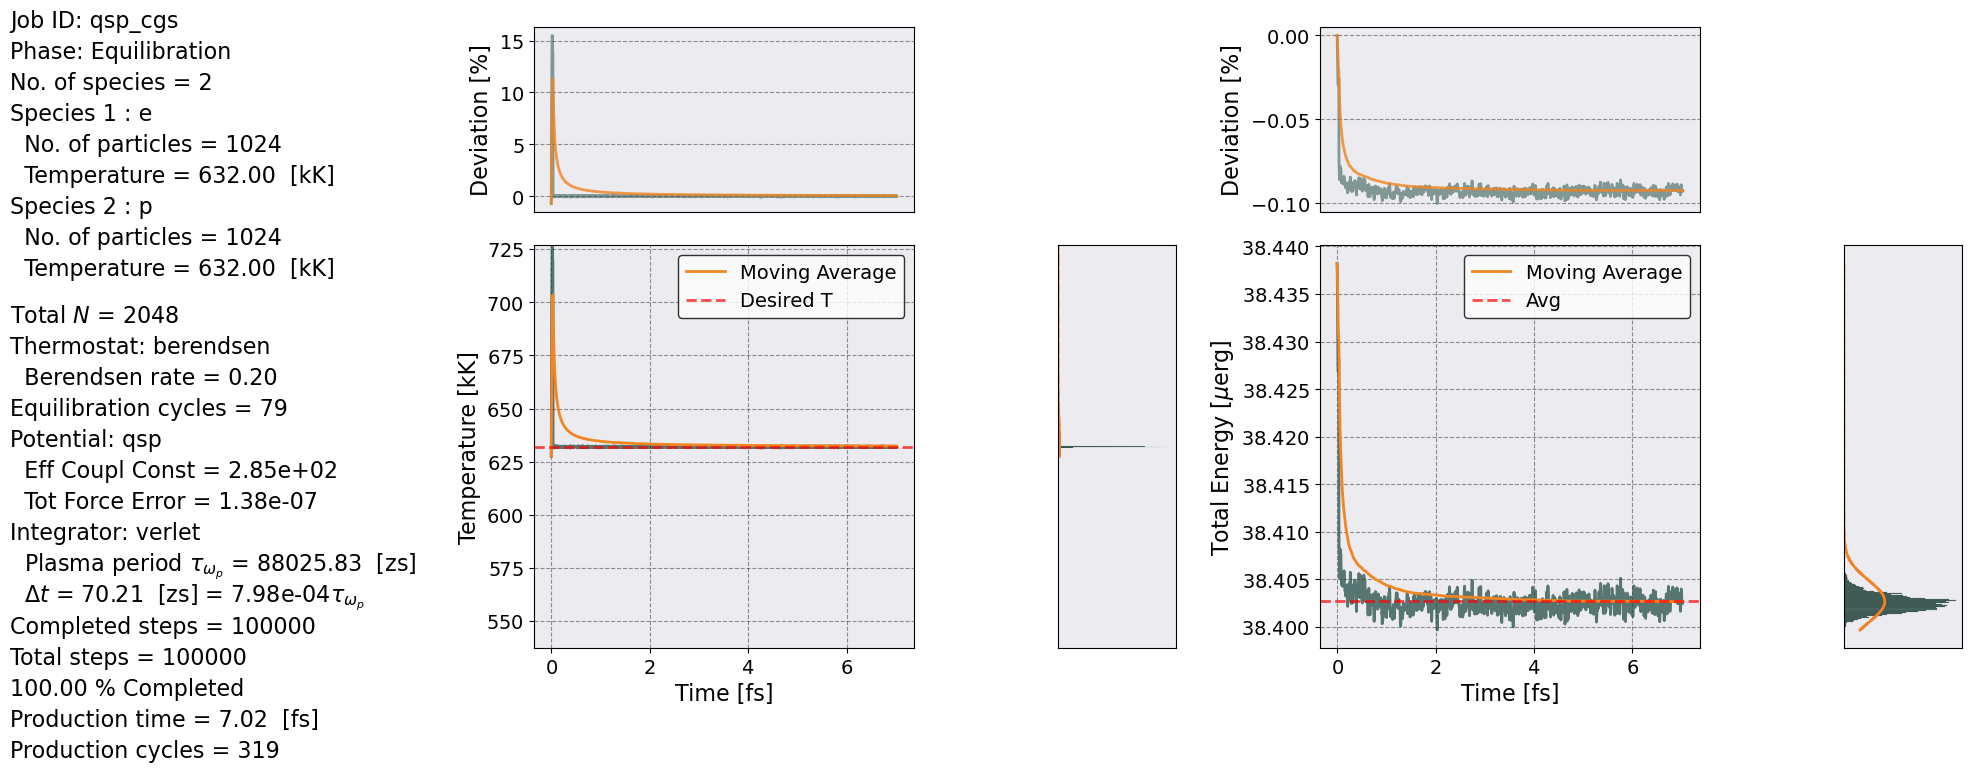

In [5]:
# Equilibration check
from sarkas.tools.observables import Thermodynamics

therm = Thermodynamics()
therm.setup(postproc.parameters, phase = "equilibration")
therm.temp_energy_plot(postproc, )



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/qsp_cgs/PostProcessing/Thermodynamics/Production/Thermodynamics_qsp_cgs.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 66667
Total time per block: T = 2.8083e-14 [s] ~ 319 plasma periods
Time interval: dt = 4.2125e-19 [s] ~ 4.8e-03 plasma period


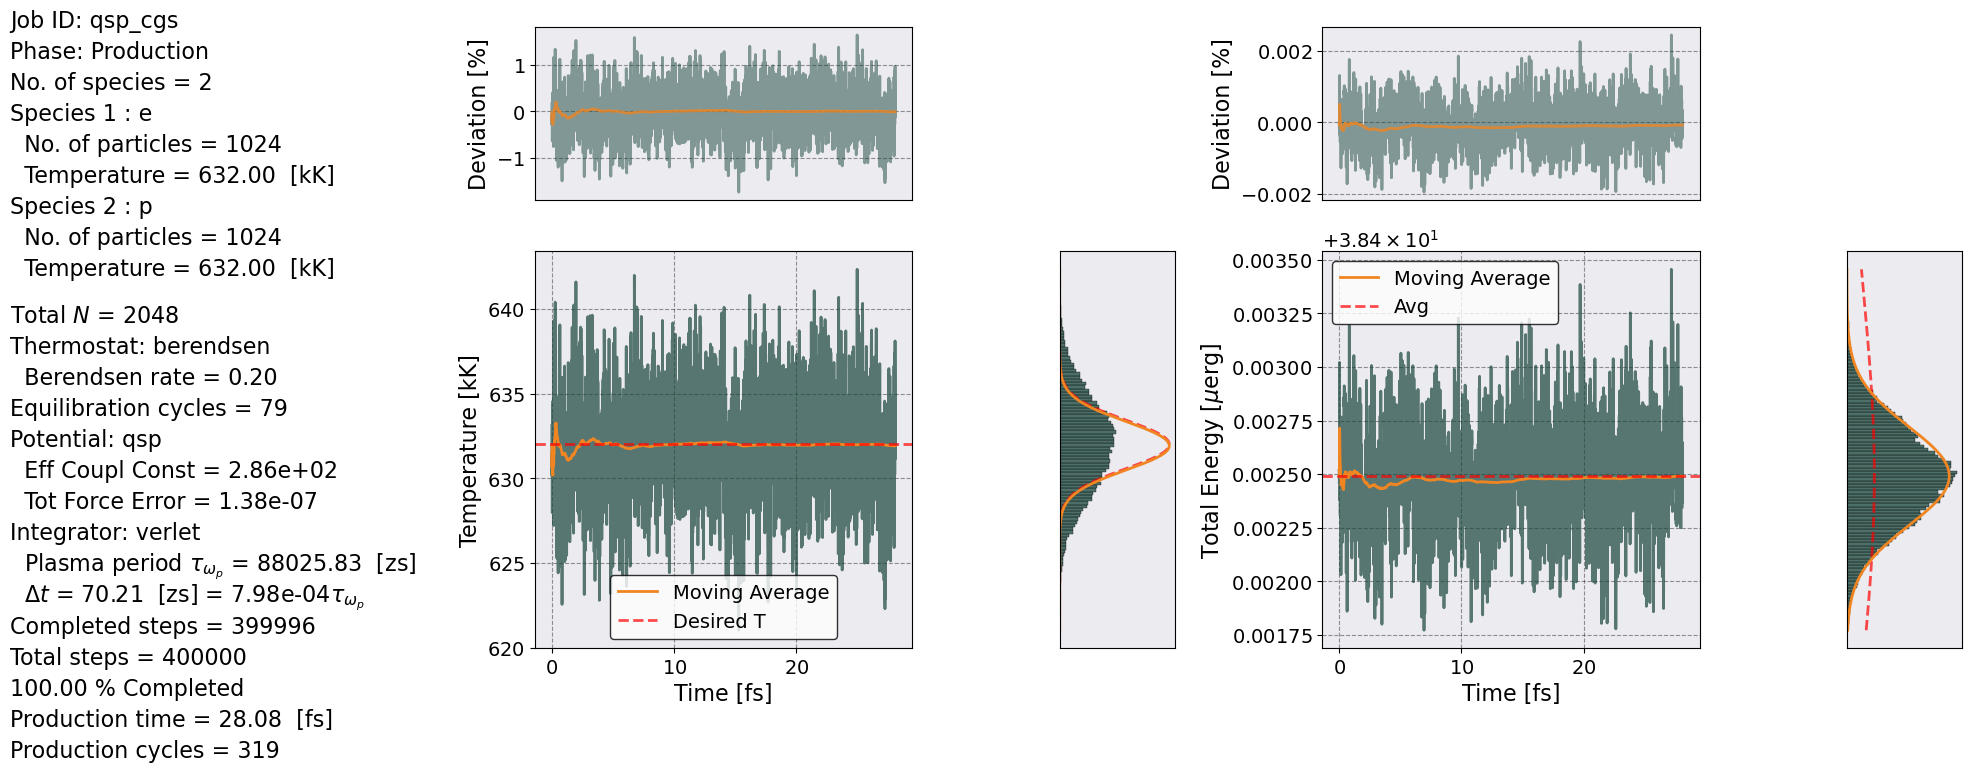

In [9]:
# Production check
therm = Thermodynamics()
therm.setup(postproc.parameters)
therm.temp_energy_plot(postproc)

In [11]:
# Radial Distribution Function 
from sarkas.tools.observables import RadialDistributionFunction

rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute()
# Grab HNC data for comparison
# hnc_r, hnc_gee, hnc_gei, hnc_gii = np.loadtxt('hnc_gall.out', unpack=True)



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/qsp_cgs/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_qsp_cgs.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 51
dr = 0.1310 a_ws = 5.5137e-10 [cm]
Maximum Distance (i.e. potential.rc)= 6.6798 a_ws = 2.8120e-08 [cm]
Time Series Data:
No. of blocks = 1
No. dumps per block = 66667
Total time per block: T = 2.8083e-14 [s] ~ 319 plasma periods
Time interval: dt = 4.2125e-19 [s] ~ 4.8e-03 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]


Radial Distribution Function Calculation Time: 0 sec 23 msec 837 usec 334 nsec


[(-0.2, 6.0),
 Text(0.5, 141.00000000000014, '$r/a_e$'),
 Text(59.085149129231766, 0.5, '$g(r)$')]

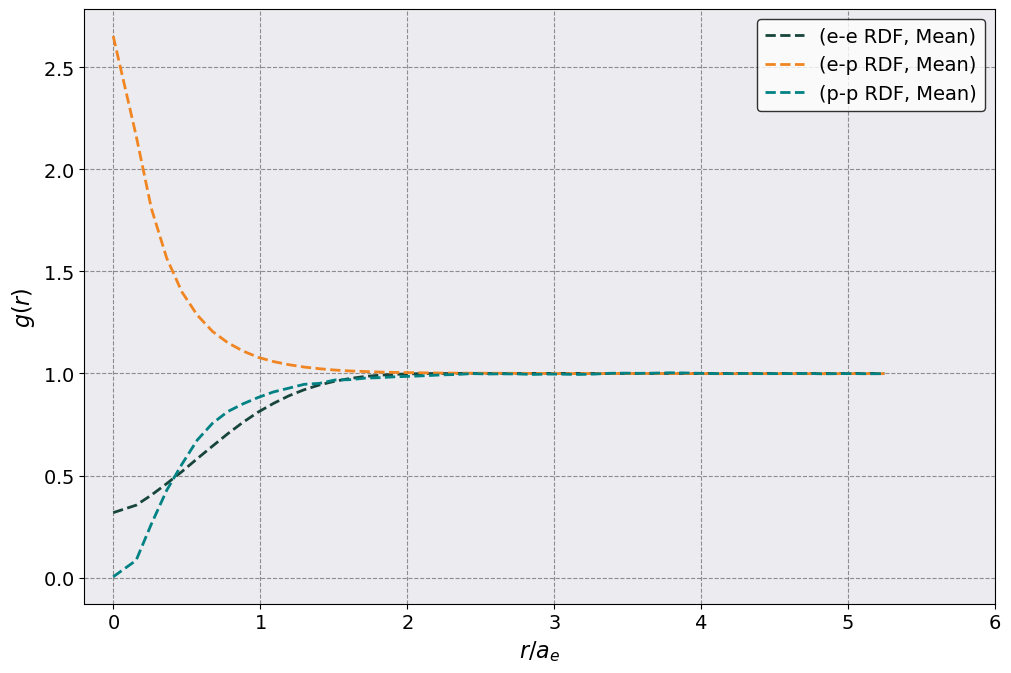

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
# ax.plot(hnc_r , hnc_gee, label = 'hnc e-e RDF')
# ax.plot(hnc_r , hnc_gei, label = 'hnc e-p RDF')
# ax.plot(hnc_r , hnc_gii, label = 'hnc p-p RDF')
rdf.plot(scaling = postproc.species[0].a_ws, 
                  y = [('e-e RDF', "Mean"),
                       ('e-p RDF', "Mean"),
                       ('p-p RDF', "Mean")
                      ],
                  ax = ax, 
                  ls = '--')
ax.legend()
ax.set(xlim = (-0.2, 6), xlabel = r'$r/a_e$', ylabel = r"$g(r)$")

In [ ]:
from sarkas.tools.observables import ElectricCurrent
from sarkas.tools.transport import TransportCoefficients

In [ ]:
ec = ElectricCurrent()
ec.setup(postproc.parameters, no_slices = 4)
#ec.compute()
ec.parse()


In [ ]:
ec.dataframe

In [ ]:
tc = TransportCoefficients(postproc.parameters)
tc.electrical_conductivity(ec, "ElectricalConductivity")

In [ ]:
tc.conductivity_df

In [ ]:
rescaling = 1.0/ec.total_plasma_frequency
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(tc.conductivity_df["Time"].iloc[:,0]*1e15, 
        tc.conductivity_df[("Electrical Conductivity", "Mean")] * rescaling,
       label = r'$\sigma$')

ax.plot(tc.conductivity_df["Time"].iloc[:,0]*1e15, tc.conductivity_df[("Electrical Conductivity", "Mean")].expanding().mean() * rescaling,
        ls = '--', label = r'Mov Avg')

ax.legend(ncol = 2)
ax.set(xlabel = r"$\tau$ [fs]",ylabel = r" $\sigma/\omega_p$")